# Breve Explicacion 
El objetivo de este cuaderno es armar un archivo de texto plano a partir de las imágenes de cadera obtenidas de un repositorio de Kaggle, y asignarles la etiqueta correspondiente, para luego incorporar dichas imágenes a la categoría "Otros" del modelos de filtrado previo al sistema de Triage y soporte a la toma de decisiones. 

#Montaje e Importación 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import os
import pandas as pd
from skimage.io import imread
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split 

# Recorrido por las carpetas

In [3]:
dir = '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera'
directories = []
for dirname, _, filenames in os.walk(dir):
    for filename in filenames:
        directories.append(os.path.join(dirname, filename))

In [59]:
# Toma las imágenes dos veces, en formato jpg y en formato DICOM
directories[78:82]

['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9088841/20090121/03074401_1x1.jpg',
 '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9088841/20090121/03074401/001',
 '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9088866/20090211/03089301/001',
 '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9089866/20090202/03006402_1x1.jpg']

# Armado DF

In [83]:
df = pd.DataFrame(directories,columns = ['Path'])
df.head()

,Path
0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...
1,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...
2,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...
3,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...
4,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...


Tal como podemos ver a continuación, por cada imagen tenemos dos archivos: uno en formato .jpg y el otro en formato DICOM. Por lo tanto, podemos escoger uno de ellos y descartar el otro. 

/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9064464/20090206/03090001_1x1.jpg
/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9064464/20090206/03090001/001


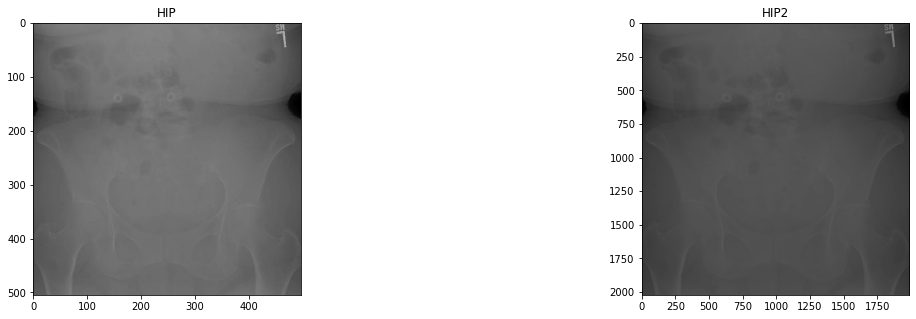

In [72]:
HIP = df['Path'].values[2]
HIP2 = df['Path'].values[3]
IMG_HIP = imread(str(HIP))
IMG_HIP2 = imread(str(HIP2))
fig,axs=plt.subplots(1,2,figsize=(20,5))
axs[0].imshow(IMG_HIP,cmap='gray')
axs[0].set_title('HIP')
axs[1].imshow(IMG_HIP2,cmap='gray')
axs[1].set_title('HIP2')
print(HIP)
print(HIP2)


In [14]:
df.to_excel("hip_all.xlsx")

In [89]:
# Escogemos las imágenes que son formato .jpg
df['jpg'] = df.Path.str.contains('.*\.jpg$')
df.head()

,Path,jpg
0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,True
1,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,False
2,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,True
3,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,False
4,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,True


In [86]:
df2 =  df[df['jpg']==True]
df2['Path'].values[0]

'/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9063934/20090112/03058602_1x1.jpg'

In [90]:
df2.head()

,Path,jpg
0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,True
2,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,True
4,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,True
6,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,True
8,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,True


In [99]:
df2.to_excel("hip_all_v2.xlsx")

# Train - Test Split 

In [91]:
(X_train_valid, X_test) = train_test_split(df2['Path'].to_numpy(),test_size=0.2,random_state=42)

In [94]:
X_test[0:10]

array(['/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9644950/20081023/02907001_1x1.jpg',
       '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9513843/20090527/03273503_1x1.jpg',
       '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9059837/20080826/02717501_1x1.jpg',
       '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9334156/20080730/02736409_1x1.jpg',
       '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9375317/20081117/02932902_1x1.jpg',
       '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9302340/20090515/03270601_1x1.jpg',
       '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9144384/20081014/02832102_1x1.jpg',
       '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9421088/20080317/02578501_1x1.jpg',
       '/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/1/9496443/20080716/02755001_1x1.jpg',
       '/c

# Guardado 


In [95]:
hip_train = pd.DataFrame(X_train_valid,columns=['Path'])
hip_test = pd.DataFrame(X_test,columns=['Path'])
hip_test.head()

,Path
0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...
1,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...
2,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...
3,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...
4,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...


In [96]:
hip_train['ImgType'] = "HIP"
hip_test['ImgType'] = "HIP"

In [97]:
hip_train.head()

,Path,ImgType
0,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,HIP
1,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,HIP
2,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,HIP
3,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,HIP
4,/content/drive/MyDrive/Quinto_Anio/TESIS_Eugen...,HIP


In [98]:
hip_train.to_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/hip_train.csv')
hip_test.to_csv('/content/drive/MyDrive/Quinto_Anio/TESIS_Eugenia_Berrino/Cadera/hip_test.csv')